# Pima Indian diabetes prediction depending on some diagnostic measurements:

In [43]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


We are going to work with a dataset got on Kaggle web, which has information about diagnostics measurements on diabetes: [link](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset) 


In [44]:
df_diabetes = pd.read_csv("datos/diabetes.csv",index_col=0)
df_diabetes.head(2)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0


In [45]:
df_diabetes = df_diabetes.reset_index()

In [46]:
# Eliminamos la columna que hace referencia al porcentaje de diabetes porque no 
# queremos utilizarla en nuestro análisis:
df_diabetes = df_diabetes.drop(['DiabetesPedigreeFunction'], axis = 1)

In [47]:
df_diabetes.shape

(768, 8)

Nuestro dataset tiene 768 filas y 8 columnas.

In [48]:
#Comprobamos que no tenga duplicados:
df_diabetes.duplicated().sum()

0

In [49]:
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age', 'Outcome'],
      dtype='object')

Este dataset proviene del National Institute of Diabetes and Digestive and Kidney
Diseases. 

El objetivo del conjunto de datos es predecir si un paciente padece diabetes
basándose en determinadas mediciones diagnósticas incluidas en él.

Se impusieron varias restricciones en la selección de estos casos de una base de datos mayor: todos los pacientes son mujeres de al menos 21 años y de ascendencia india Pima (cuya población residente en E.E.U.U. ha sido ampliamente estudiada por la alta prevalencia de diabetes tipo 2 y la obesidad que presenta (de las más altas del mundo): [fuente](https://roserrubinat.com/2014/11/03/la-historia-de-los-indios-pima/).

Con la diabetes tipo 1 el cuerpo produce poca o ninguna insulina; en la diabetes tipo 2 por el contrario, el cuerpo tal vez pueda seguir produciendo insulina, pero las células no responden bien a ella y no pueden absorber suficiente glucosa de la sangre ( a esto se le llama resistencia a la insulina). [fuente](https://medlineplus.gov/spanish/pruebas-de-laboratorio/insulina-en-la-sangre/)

En el conjunto de datos del archivo csv podemos encontrar varias variables, algunas de ellas independientes (varias variables médicas predictoras) y sólo una variable dependiente objetivo ("Outcome").

A continuación detallamos el contenido de las columnas de nuestro dataset:

* Pregnancies: Para expresar el número de embarazos.

* Glucose: Nivel de glucosa en sangre.
 
* BloodPressure: Presión arterial.

* SkinThickness: Grosor de la piel

* Insulin: Nivel de insulina en sangre

* BMI: Indice de masa corporal

* Age: Edad

* Outcome: Resultado (1 = Sí, 0 = No)

In [50]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Age            768 non-null    int64  
 7   Outcome        768 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 48.1 KB


In [51]:
# Comprobamos que no tengamos nulos:
df_diabetes.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Age              0
Outcome          0
dtype: int64

In [52]:
df_diabetes.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
Age                int64
Outcome            int64
dtype: object

In [53]:
df_diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.0,1.0,3.0,6.00,17.0
Glucose,768.0,120.894531,31.972618,0.0,99.0,117.0,140.25,199.0
BloodPressure,768.0,69.105469,19.355807,0.0,62.0,72.0,80.00,122.0
SkinThickness,768.0,20.536458,15.952218,0.0,0.0,23.0,32.00,99.0
Insulin,768.0,79.799479,115.244002,0.0,0.0,30.5,127.25,846.0
BMI,768.0,31.992578,7.884160,0.0,27.3,32.0,36.60,67.1
Age,768.0,33.240885,11.760232,21.0,24.0,29.0,41.00,81.0
Outcome,768.0,0.348958,0.476951,0.0,0.0,0.0,1.00,1.0


In [54]:
# Cómo no tenemos ninguna variable de tipo "object" no podremos hacer este describe
#df_diabetes.describe(include="object").T

In [55]:
for col in df_diabetes.select_dtypes(exclude='category'): print(f'{[col]} : {df_diabetes[col].unique()}') 

['Pregnancies'] : [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
['Glucose'] : [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
['BloodPressure'] : [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
['SkinThickness'] : [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16

## Análisis exploratorio visual:

### Variable respuesta:

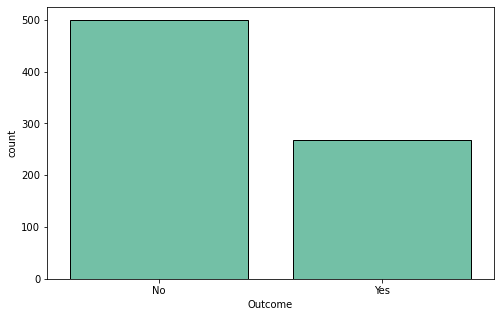

In [56]:
plt.figure(figsize=(8,5)) # para cambiar el tamaño de la figura

fig1 = sns.countplot(data = df_diabetes, x = "Outcome",  color = "mediumaquamarine",  edgecolor='black')
fig1.set(xticklabels=["No", "Yes"]) 
plt.show();

Comprobamos en esta gráfica como el número de personas cuyo resultado ha sido negativo es prácticamente el doble.

In [57]:
# Si lo vemos en porcentaje:
df_diabetes["Outcome"].value_counts() / df_diabetes.shape[0]


0    0.651042
1    0.348958
Name: Outcome, dtype: float64

Teniendo en cuenta que 1 es Sí y 0 es No, podemos decir que el 35% tienen diabetes y el 65% no.

* En caso de que hubiera variables categóricas haríamos también una representación gráfica

### Variables continuas

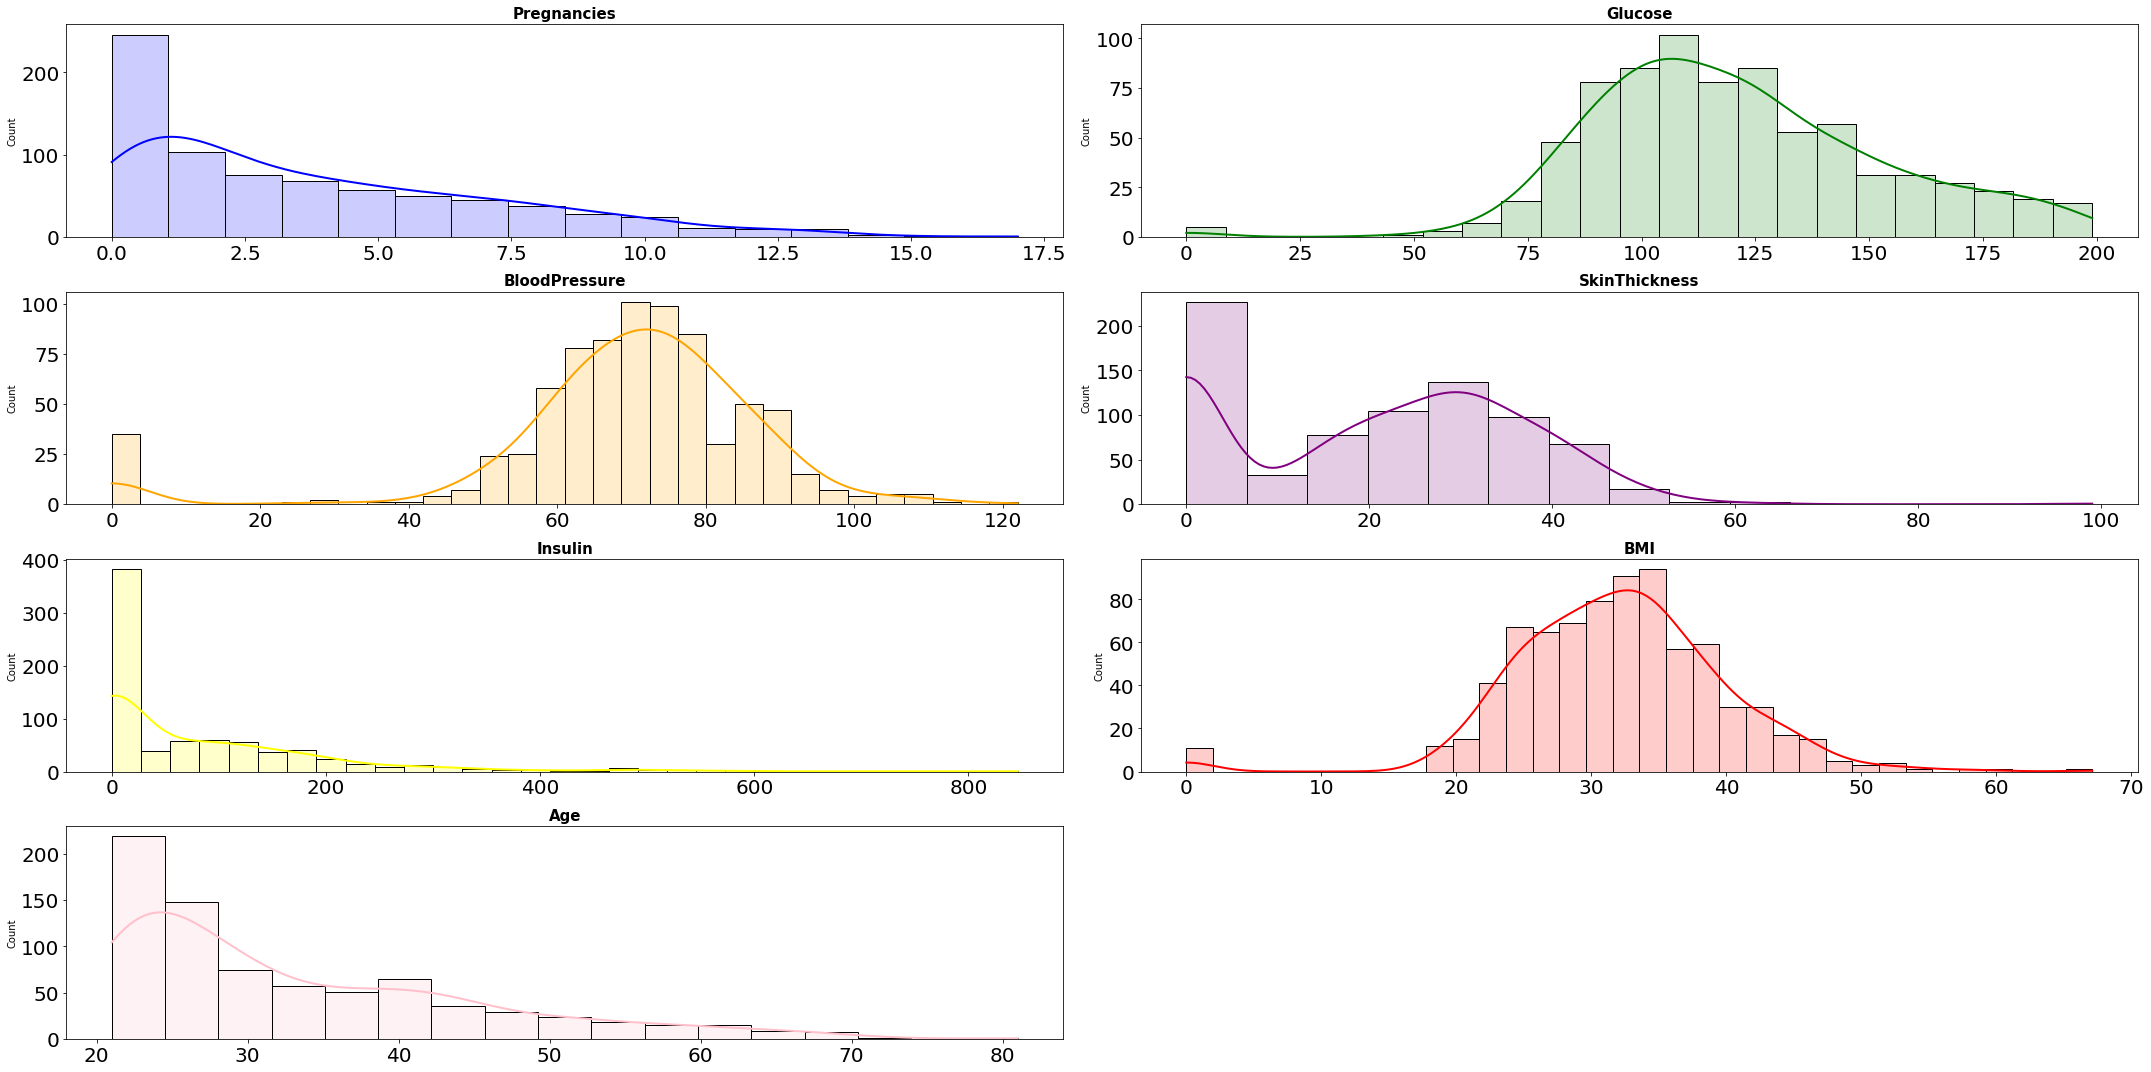

In [58]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (30, 15))

lista_colores = ["blue", "green", "orange", "purple", "yellow", "red", "pink", "grey"]

axes = axes.flat

columnas_numeric = df_diabetes.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("Outcome")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df_diabetes,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.delaxes(axes[-1])    
fig.tight_layout();

* Pregnancies : Vemos en las gráficas como el número de embarazos más frecuente es de 1. Las mujeres que pasan por dos embarazos son casi la mitad y de ahí en adelante la proporción de embarazos se va reduciendo progresivamente.


* Glucose: Suponiendo que las mediciones se hayan hecho en ayunas, los valores de azúcar en sangre de 99 mg/dl o menores son normales, los de 100 a 125 mg/dl indican que tiene prediabetes, y de 126 mg/dl o mayores indican que tiene diabetes.[fuente](https://www.cdc.gov/diabetes/spanish/basics/getting-tested.html)

    En la gráfica vemos que el nivel de glucosa en sangre más frecuente es de aproximadamente 115 mg/dl, seguido de 100 y 125 mg/dl (en los 3 casos serían señal de prediabetes). 

    Hay también muchos individuos que han registrado valores de más de 125 mg/dl y que serían señal de diabetes.

* BloodPressure: Para medir la presión sanguínea se emplean dos valores y la gráfica sólo nos proporciona una. En cualquier caso si podemos afirmar que la mayoría de individuos están entre 60 y 80.

* SkinThickness: A la hora de considerar este parámetro se tiene en cuenta la piel y el tejido subcutáneo; y según la bibliografía consultada parece que el aumento del grosor de la piel está relacionado con la resistencia a la insulina.
[fuente](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3784870/)

    Si observamos la gráfica vemos que la medida más baja registrada de este parámetro la han proporcionado más de 200 mujeres. A su vez valores más altos del grosor de la piel se da en más de 300 mujeres.

* Insuline: En lo que refiere a los niveles de insulina, los valores presentados por la mayoría de los individuos de estudio son normales, dado que un nivel de insulina basal entre 5-25 U/ml es considerado normal, y mayor a 30 U/ml sugiere insulinoresistencia. [fuente](https://www.farestaie.com.ar/cd-interpretacion/te/pd/24.htm)

* BMI: Si su IMC es entre 18.5 y 24.9, se encuentra dentro del rango de peso normal o saludable. Si es entre 25.0 y 29.9, se encuentra dentro del rango de sobrepeso. Y si es 30.0 o superior, se encuentra dentro del rango de obesidad. [fuente](https://www.cdc.gov/healthyweight/spanish/assessing/index.html)

    En el caso de nuestra muestra vemos que esta variable presenta una distribución que se asemeja a una campana de Gauss y que indica cierta normalidad. Según la gráfica muchas de las mujeres presentan sobrepeso y una mayoría de ellas obesidad.

* Age: La mayoría de las mujeres del estudio tienen entre 21 y 30 años, y a medida que aumenta el rango de edad disminuye el número de individuos correspondiente.


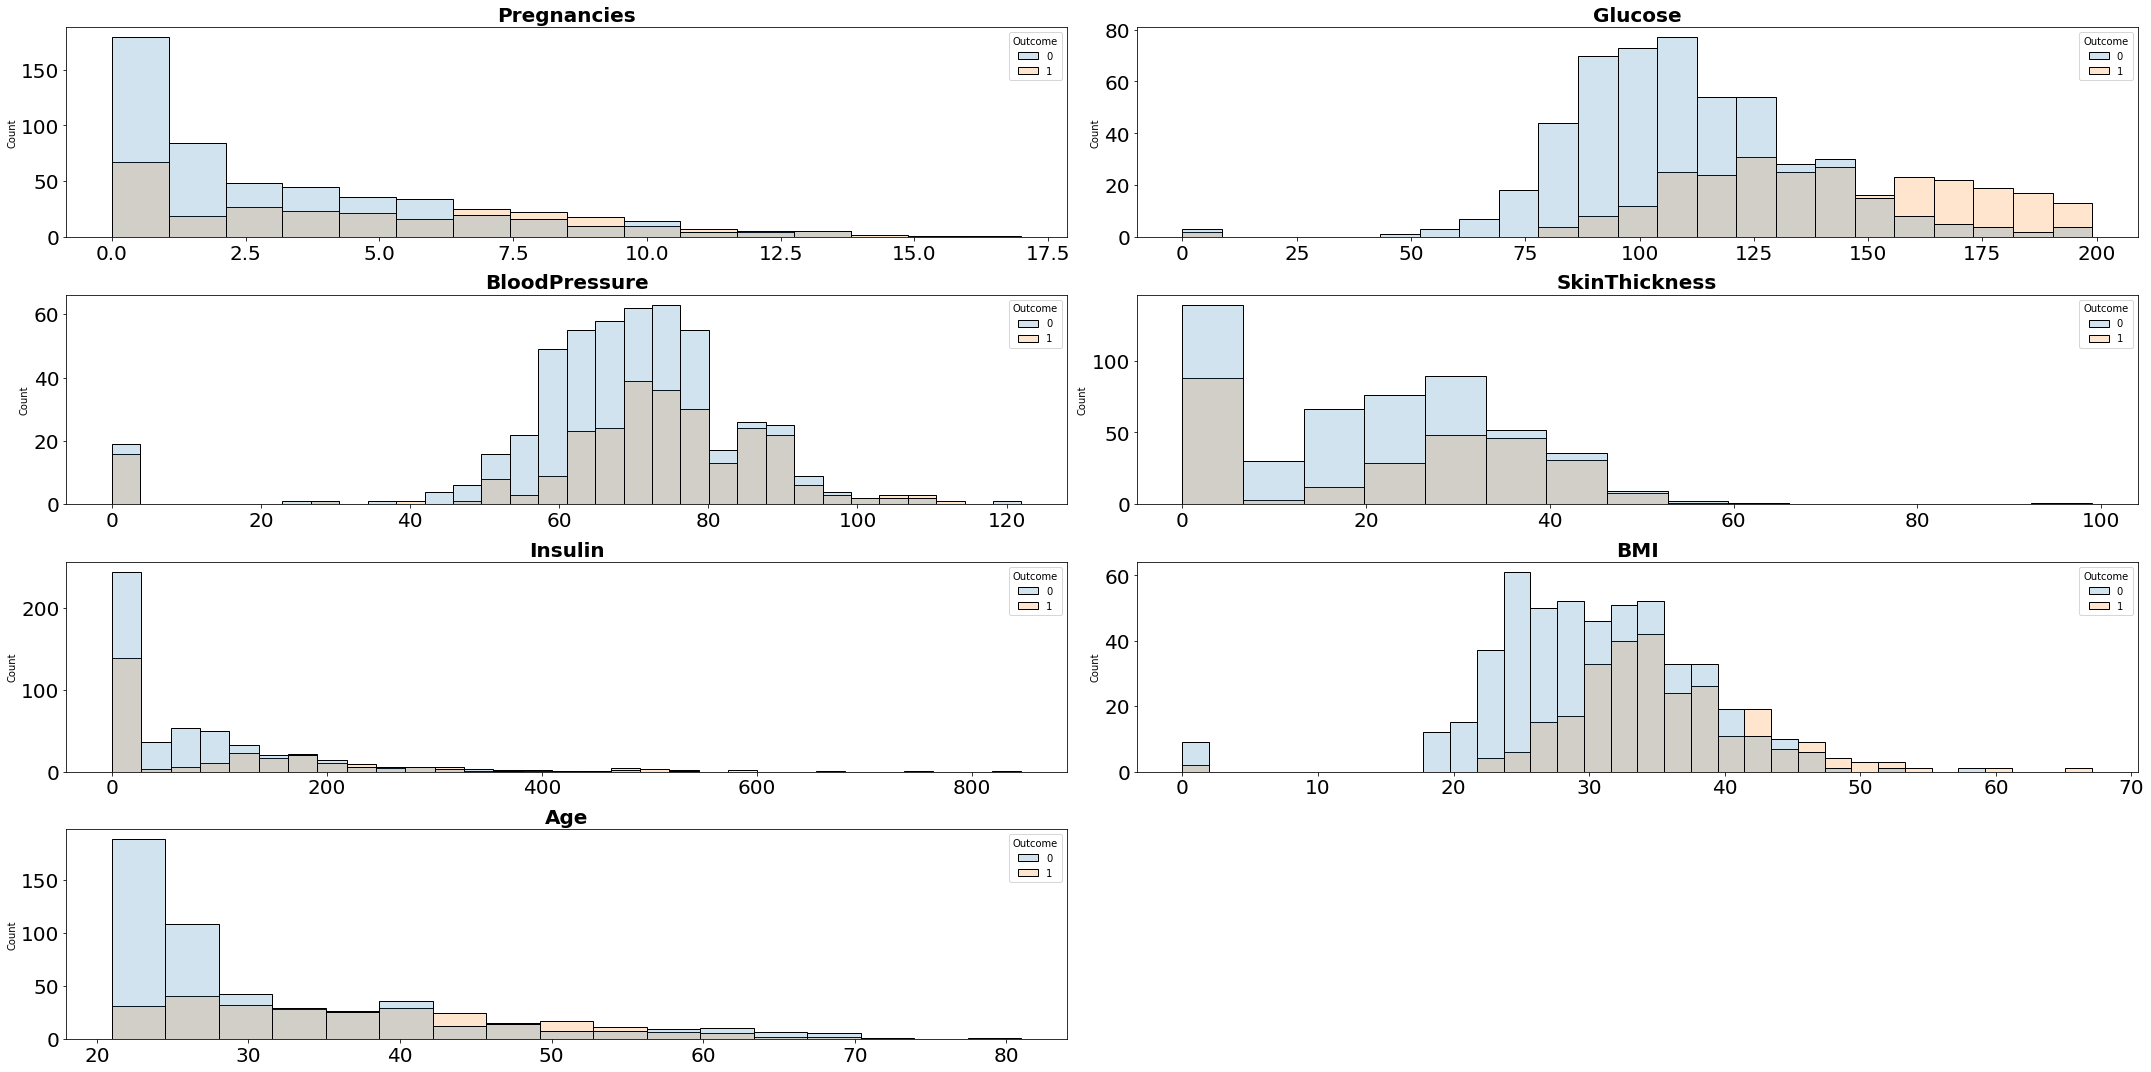

In [59]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (30, 15))


axes = axes.flat

columnas_numeric = df_diabetes.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("Outcome")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df_diabetes,
        x = colum,
        hue = "Outcome", 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 20, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
fig.delaxes(axes[-1])    
fig.tight_layout();

Recordemos de cara la la interpretación de estas gráficas, que el outcome 1 significa diabetes y el 0 no diabetes.

* Pregnancies : A medida que aumenta el número de embarazos mayor es la proporción de diagnósticos de diabetes. Es decir, en mujeres que tienen 7 embarazos o más presentan en su mayoría diabetes.


* Glucose: Cuanto mayor es el nivel de azúcar en sangre mayor el índice de diabetes, por encima de 155 son más las mujeres con diabetes que sin ella.

* BloodPressure: Hasta valores de 80 son más las mujeres no diabéticas, pero superada esta medida ha sido muy similar las mujeres con diabetes que sin ella.

* SkinThickness: A medida que aumenta el grosor de la piel el número de mujeres diagnosticadas con diabetes se va igualando a las que no lo han sido.

* Insuline: Una vez rebasado el valor de 100, el número de mujeres diabéticas es casi igual al de mujeres que no lo son.

* BMI: Con un BMI de entre 30 y 40 y en adelante, la proporción entre mujeres diabéticas y no diabéticas se aproxima mucho.


* Age: Desde los 30 años en adelante, el número de mujeres diagnosticadas de diabetes es casi el mismo que el de las que no han sido diagnosticadas. Con más de 40 años, aunque por poca diferencia, son más las mujeres diabéticas estudiadas. 


In [60]:
df_diabetes["Pregnancies"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

Las conclusiones que sacamos de estas gráficas

## Gráfico de correlación o Heatmap

In [61]:
df_numericas = df_diabetes.select_dtypes(include = np.number)
df_numericas.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1


In [62]:
# Nuestra matriz de correlación:
correlacion = df_numericas.corr()
correlacion

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.036242,0.292695
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.238356,1.000000


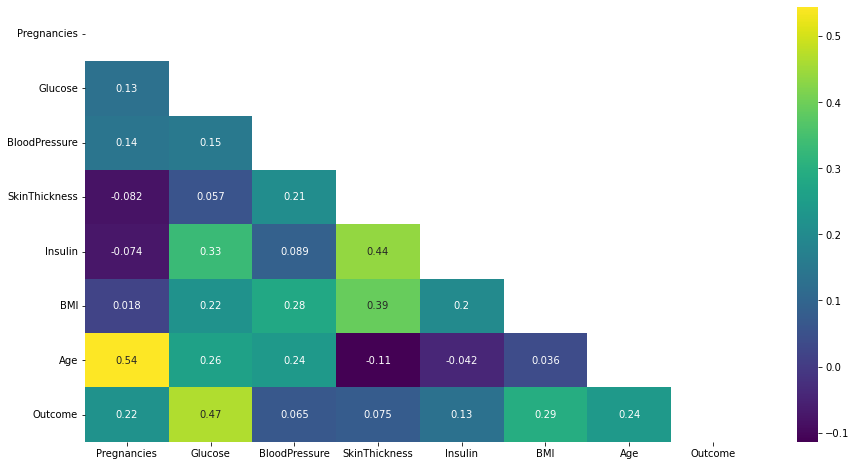

In [63]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(correlacion, dtype=bool))
sns.heatmap(correlacion, cmap="viridis", annot = True, mask = mask); #barra lateral

El heatmap corrobora por ejemplo que como decía la bibliografía consultada existe relación entre el grosor de la piel y los niveles de insulina, y entre el grosor de la piel y el BMI.
Lo que más influye en un diagnóstico de diabetes es (por orden de mayor a menor influencia) obviamente el nivel de glucosa en sangre, el índice de masa corporal (BMI), la edad, los embarazos y el nivel de insulina en sangre.

Por otra parte cabe observar también que según el heatmap, a mayor edad menor grosor de la piel.

Dado que ninguna de nuestras variables tiene un valor de correlación mayor que 0.7 o menor que -0.7, no eliminaremos ninguna columna. 

### Preprocesamiento

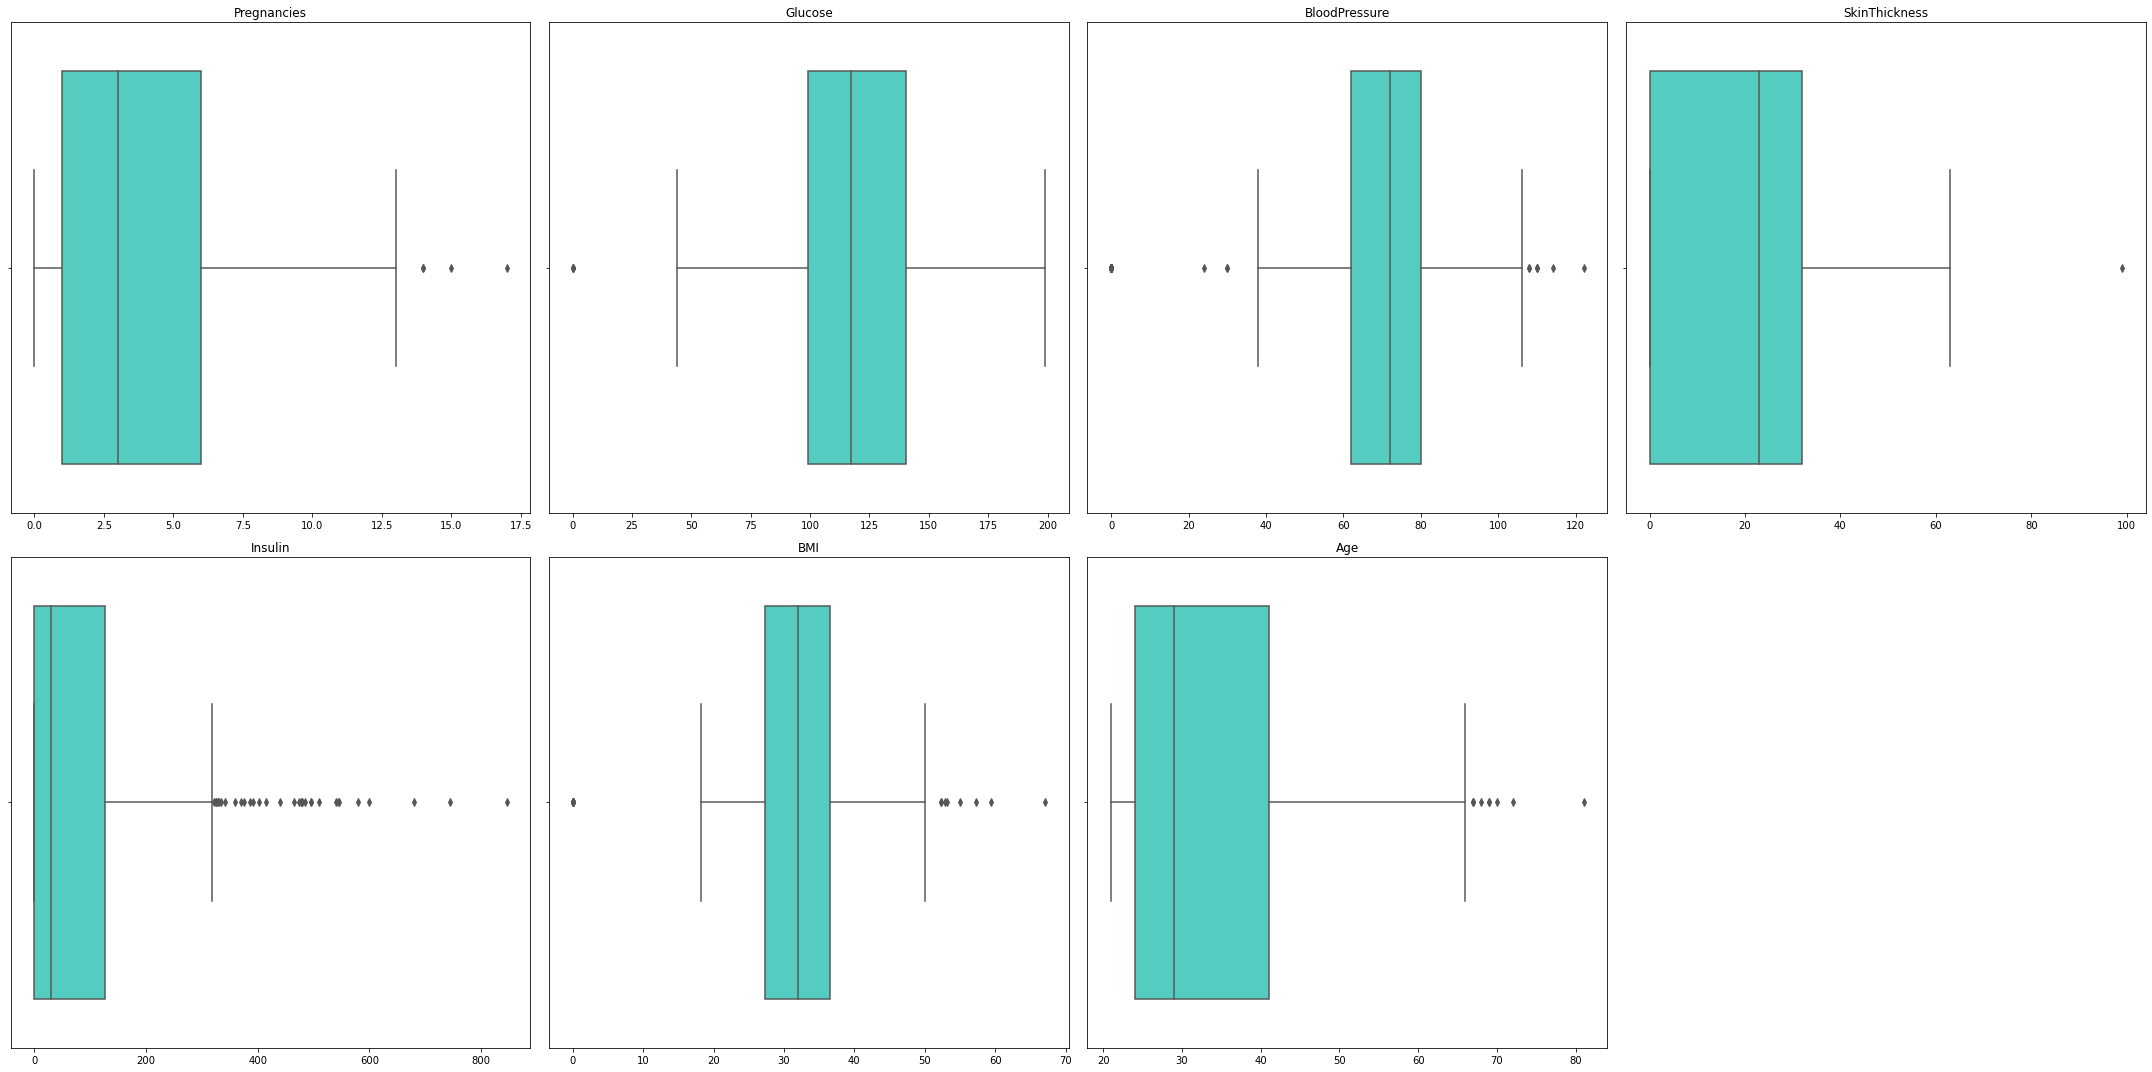

In [64]:
fig, axes = plt.subplots(2, 4, figsize=(30,15))

categorias = df_numericas.drop("Outcome", axis = 1).columns

axes = axes.flat

for indice, cate in enumerate(categorias):

    sns.boxplot(x = df_diabetes[cate], data = df_diabetes, ax=axes[indice], color = "turquoise"); # para trazar una línea de densidad

    axes[indice].set_title(cate)
    axes[indice].set_xlabel("")
    
fig.delaxes(axes[-1])
fig.tight_layout();

Vemos que tenemos algunos outliers, sobretodo en la columna correspondiente a la insulina, que habrá que gestionar:

In [65]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [66]:
lista_columnas = df_numericas.columns
lista_columnas

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age', 'Outcome'],
      dtype='object')

In [67]:
ind = detectar_outliers(lista_columnas, df_diabetes)
print(ind)

{'Pregnancies': [88, 159, 298, 455], 'Glucose': [75, 182, 342, 349, 502], 'BloodPressure': [7, 15, 18, 43, 49, 60, 78, 81, 84, 106, 125, 172, 177, 193, 222, 261, 266, 269, 300, 332, 336, 347, 357, 362, 426, 430, 435, 453, 468, 484, 494, 522, 533, 535, 549, 589, 597, 601, 604, 619, 643, 691, 697, 703, 706], 'SkinThickness': [579], 'Insulin': [8, 13, 54, 111, 139, 153, 186, 220, 228, 231, 247, 248, 258, 286, 296, 360, 370, 375, 392, 409, 415, 480, 486, 519, 574, 584, 612, 645, 655, 695, 707, 710, 715, 753], 'BMI': [9, 49, 60, 81, 120, 125, 145, 177, 193, 247, 303, 371, 426, 445, 494, 522, 673, 684, 706], 'Age': [123, 363, 453, 459, 489, 537, 666, 674, 684]}


In [69]:
# Los vamos a sustituir por la mediana:

for k, v in ind.items():
    mediana = df_diabetes[k].median() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
    for i in v: # iteremos por la lista de valores para cada columna
        df_diabetes.loc[i,k] = mediana 

Guardamos el csv para las siguientes lecciones:

In [72]:
df_diabetes.to_csv("datos/diabetes_limpio.csv")